# **Introduction :**

-  **Project Title :-**  Energy_Consumption_and_Prediction

*  **Problem Statement :-** Increasing energy demand makes it hard to manage resources efficiently.

* **Project Aim :-**  The aim of the this project is to analyze the household electric power consumption dataset and extract meaningful insights. This could involve understanding consumption patterns, identifying peak usage times, and predicting future power consumption.

* **Project Dataset :-**
The "Household Power Consumption" dataset contains measurements of electric power consumption in a single household over a period of time. The data includes details recorded every minute Dec 2006 to Nov 2010.

*  **In-Detailed Overview :-**
  

| **Rows**     | **Columns** | **Time Period**         | **Granularity**          |
|--------------|-------------|-------------------------|---------------------------|
| 2,075,259    |     9           | Dec 2006 - Nov 2010    | Data is recorded every minute |

- **Columns Description :-**

| **Feature**              | **Description**                                                                                               | **Data Type**       |
|--------------------------|---------------------------------------------------------------------------------------------------------------|---------------------|
| **Date**                 | The date of the observation in the format DD/MM/YYYY.                                                        | Object              |
| **Time**                 | The time of the observation in the format HH:MM:SS.                                                          | Object              |
| **Global_active_power**  | Household global active power in kilowatts (kW). Total power consumed by the household appliances.           | Numeric             |
| **Global_reactive_power**| Household global reactive power in kilovolt-amperes reactive (kVAR).                                         | Numeric             |
| **Voltage**              | Voltage (in volts) supplied to the house during the given minute.                                            | Object initially; should be numeric |
| **Global_intensity**     | Current intensity in amperes (A). Total electrical current being drawn at that moment.                       | Object initially; should be numeric |
| **Sub_metering_1**       | Energy sub-metering for the kitchen (in watt-hours of active energy). Ex :- Dishwasher, oven.  | Object initially; should be numeric |
| **Sub_metering_2**       | Energy sub-metering for the laundry room (in watt-hours of active energy). Ex :- Washing machine.         | Object initially; should be numeric |
| **Sub_metering_3**       | Energy sub-metering for electric water-heater and air-conditioning systems (in watt-hours of active energy). | Float64             |
| **Missing Values**       | The dataset contains missing values, particularly in the Sub_metering_3 column (about 1.25% of the data).    | -                   |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

we have importing these libraries in Python. It is neccessary

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=35cea5f2-6f12-4eb4-969c-8bfb1da2cc1a
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 215MB/s]


Downloading the file from google drive.

In [ ]:
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-3-e38478b95906>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


Reading the file from the system.

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


I observed here that the **df.head()**
displays the first five rows of the DataFrame, which is useful for checking the data's structure and contents.

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


I observed here that the **df.tail()** displays the last five rows of the DataFrame, which is useful for reviewing the final entries in the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


I observed here that **df.info()** provides a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage, which helps in understanding the dataset's structure and identifying missing or inconsistent data.

In [ ]:
df.shape

(2075259, 9)

I observed here that **df.shape** returns the dimensions of the DataFrame as a tuple, showing the number of rows and columns, which helps in quickly understanding the size of the dataset.

In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

### Observations:
1. Ensures all columns are in the appropriate numeric format for calculations and visualizations.
2. Handles invalid or missing data gracefully by converting them to `NaN`.
3. Prepares the dataset for analysis and avoids errors when performing mathematical operations.

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned
df.head()

<ipython-input-22-3a4ebfba6603>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


- Here, I combines the Date and Time columns into a DateTime column, then extracts the Year, Month, Day, Hour, and Minute from it into new columns. It prepares the dataset for time-based analysis, making it easier to group or filter data by specific time intervals like year, month, day, or hour.

---
---

# ARIMA (Auto Regressive Integrated Moving Average) Model :

# Installation for ARIMA model :

In [ ]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.4 MB/s eta 0:00:00


# 1. ARIMA Parameters :-
Each component in ARIMA functions as a parameter with a standard notation. For ARIMA models, a standard notation would be ARIMA with \( p, d, \) and \( q \), where integer values substitute for the parameters to indicate the type of ARIMA model used. The parameters can be defined as:  

- **\( p \):** The number of lag observations in the model, also known as the lag order.  
- **\( d \):** The number of times the raw observations are differenced; also known as the degree of differencing.  
- **\( q \):** The size of the moving average window, also known as the order of the moving average.  

# 2. Math Behind ARIMA Model :-

**ARIMA is built on these three components:**

1. **AutoRegression (AR):**  
   \( AR(p) : X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t \)  
   - \( p \): Number of lagged observations in the model (AR order).  
   - \( \phi \): Coefficients of the lagged terms.  
   - \( \epsilon_t \): White noise.  

2. **Differencing (I):**  
   \( I(d) : Y_t = X_t - X_{t-1} \)  
   - \( d \): Order of differencing to make the series stationary.  

3. **Moving Average (MA):**  
   \( MA(q) : X_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} \)  
   - \( q \): Number of lagged forecast errors (MA order).  
   - \( \theta \): Coefficients of the error terms.  

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(y_train, order=(5,1,0)) # Example order, you might need to tune this
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


It tells how to use the ARIMA model for time series forecasting. It fits an ARIMA model with specified parameters to training data , predicts future values on test data and evaluates the model's performance using Root Mean Squared Error (RMSE).

In [ ]:
print("RMSE:", rmse)

RMSE: 1.524299163718749


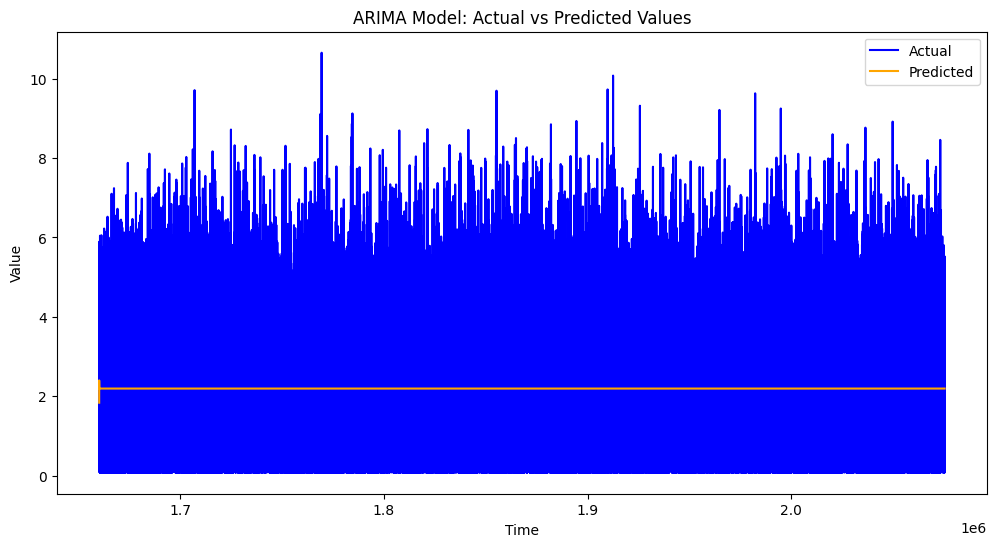

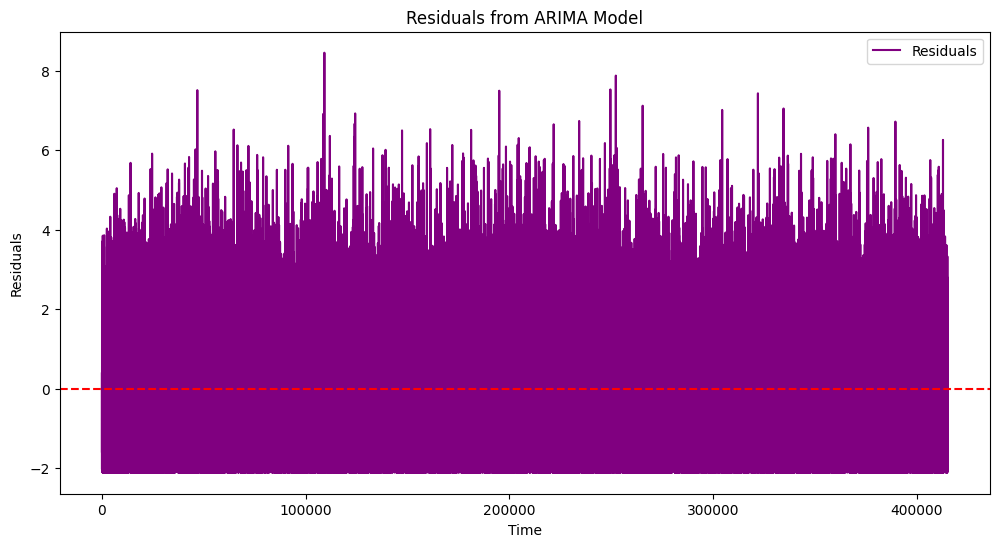

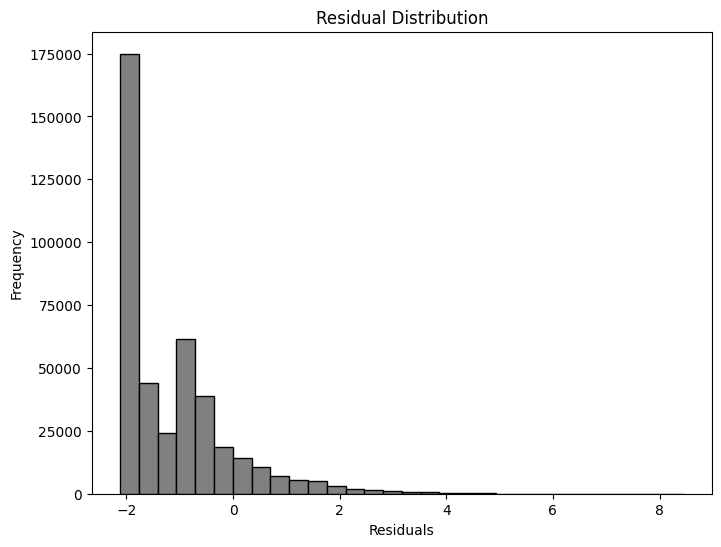

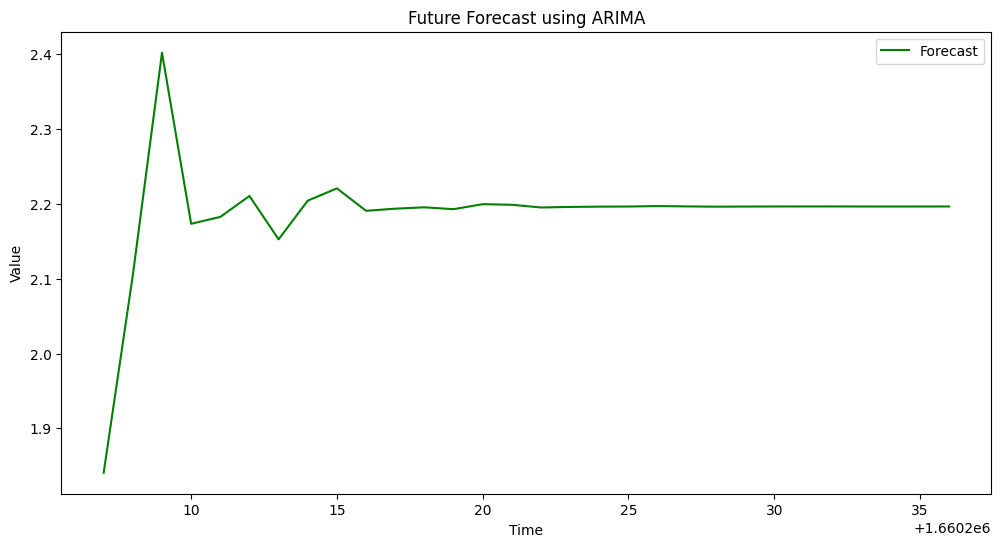

In [ ]:
w

---

## **PROPHET MODEL**

**Prophet Model**:
The Prophet model by Facebook is an additive time series forecasting model designed for datasets with strong seasonality, trends, and missing data. Its equation can be expressed as:


y(t)=g(t)+s(t)+h(t)+ϵ


Where:


g(t): Trend Component
Represents the overall increase or decrease in the data over time.

Can be linear or logistic growth depending on the dataset.


s(t): Seasonality Component
Captures repeating patterns (e.g., daily, weekly, yearly).

Automatically detects seasonality from the data.
User-defined periodicities can also be added.

h(t): Holiday Effect
Incorporates the impact of holidays or special events on the time series.


 : Noise
Represents the unexplained variations or residuals in the data.

# Installation for Prophet model:

In [ ]:
!python -m pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.1 MB/s eta 0:00:00


In [ ]:
from prophet import Prophet

In [ ]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})


In [ ]:
data.y.value_counts()

,count
y,
0.218,9565
0.216,9363
0.322,9350
0.324,9304
0.326,9187
...,...
7.860,1
7.252,1
8.814,1


In [ ]:
df.Global_active_power.value_counts()

,count
Global_active_power,
0.218,9565
0.216,9363
0.322,9350
0.324,9304
0.326,9187
...,...
7.860,1
7.252,1
8.814,1


In [ ]:
train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7) # weekly prediction
future_dates_30days = model.make_future_dataframe(periods=30) # monthly prediction

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphfwk0voh/lqc44nq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphfwk0voh/oeoyszxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16929', 'data', 'file=/tmp/tmphfwk0voh/lqc44nq3.json', 'init=/tmp/tmphfwk0voh/oeoyszxn.json', 'output', 'file=/tmp/tmphfwk0voh/prophet_model7xheiwvl/prophet_model-20241124135347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


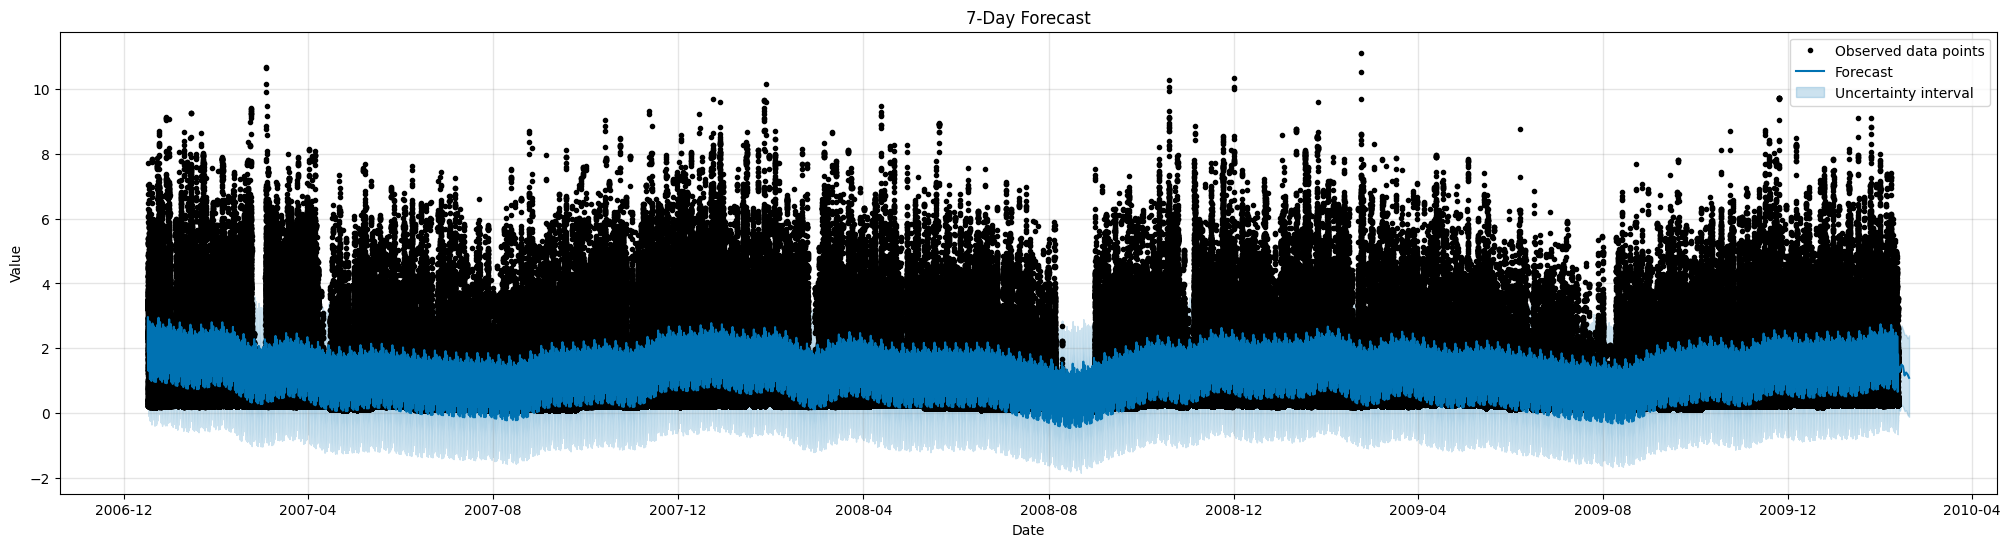

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



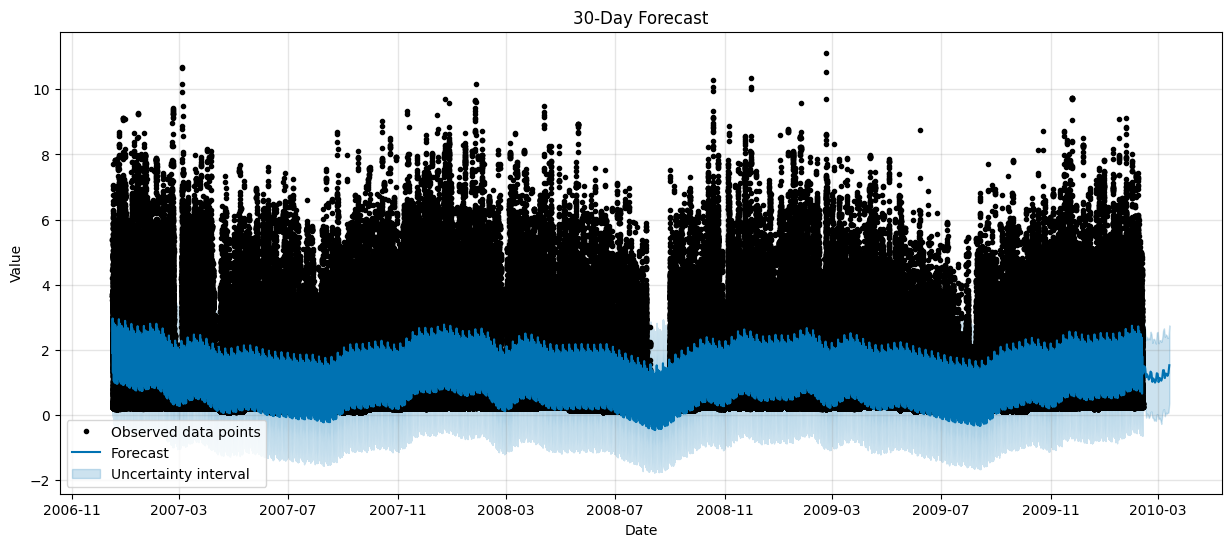

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
predictions_30days.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

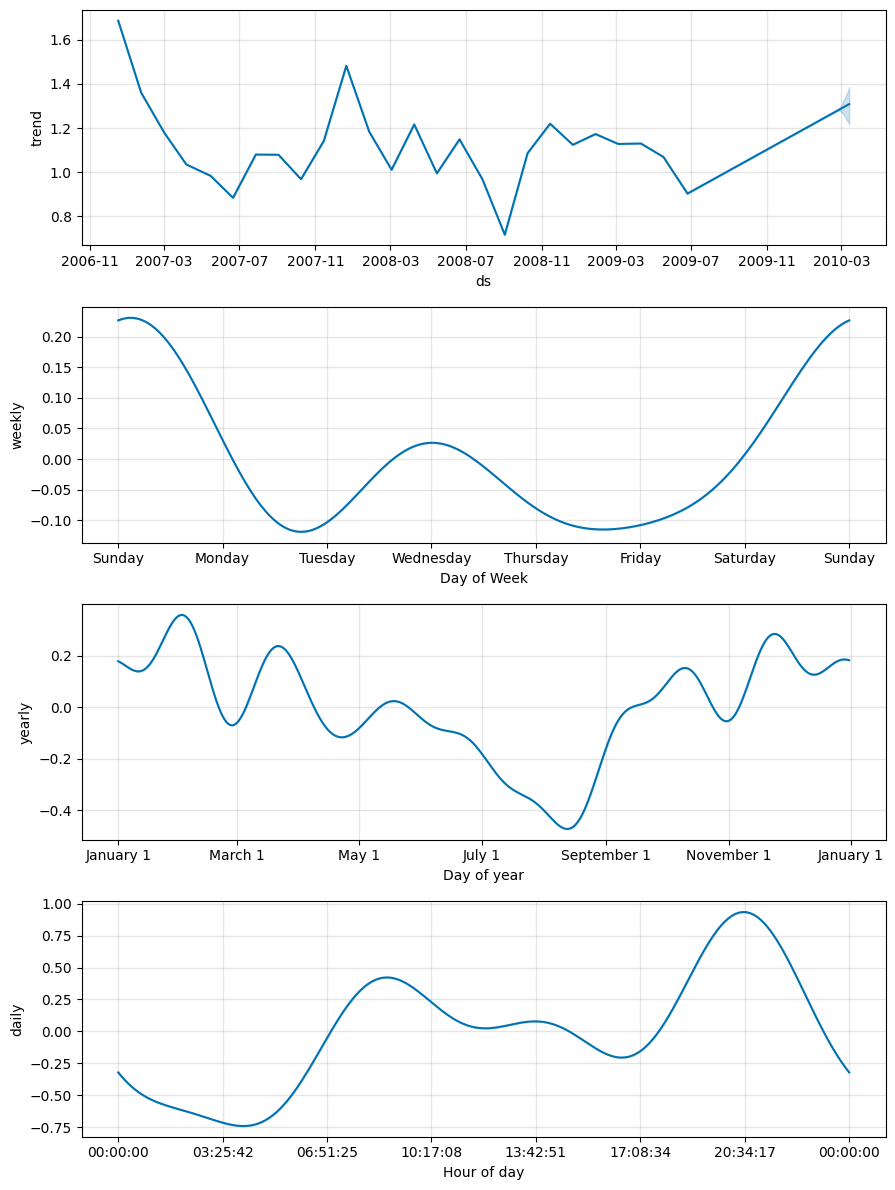

In [ ]:
model.plot_components(predictions_30days);

* Component analysis in Prophet helps break down the time series forecast into its fundamental building blocks—trend, seasonality, and any added holidays or events. It is particularly valuable for understanding the underlying patterns in the data and making the forecasts interpretable.

## **Observations :**

Seasonality :--
- Daily Pattern :-
Likely highest during early morning (6-8 AM) and evening (6-9 PM) hours, driven by heating, cooling, cooking, and general household activity.

- Weekly Pattern :-
Highest energy consumption is usually during weekdays due to working hours, industrial usage, and office buildings.
Weekends will have lower consumption as people are home but generally using less electricity for industrial or commercial purposes.

- Monthly Pattern :-
Winter months (December, January) and summer months (June, July) often show higher power consumption.
Spring and autumn typically see lower consumption, except in regions with significant seasonal extremes.

- Yearly Pattern :-
Increasing yearly consumption might be driven by population growth or economic development. However, unexpected spikes can be attributed to specific events like weather anomalies or significant changes in industry usage.

Trend :--

The global trend represents the long-term behavior of energy consumption. Example: A steady increase or decrease could indicate rising or falling usage over time.